# Análisis exploratorio

## Descripción del dataset



1. individual_id: id del individuo.
2. address_id: id de la dirección del individuo.
3. curr_ann_amt: dinero pagado por el usuario del seguro en el año anterior, en dólares.
4. days_tenure: el número de días que el individuo ha sido cliente del seguro.
5. cust_orig_date: la fecha que el individuo se hizo cliente.
6. age_in_years: edad del individuo.
7. date_of_birth: fecha de nacimiento del individuo.
8. latitude: latitud del hogar del individuo.
9. longitude: longitud del hogar del individuo.
8. city: ciudad de residencia del individuo.
9. state: estado de residencia del individuo.
10. county: condado de residencia del individuo.
11. income: nivel de ingresos, en dólares.
12. has_children: 1 indica que el individuo tiene hijos, 0 en caso contrario.
13. length_of_residence: número de años que el individuo ha vivido en su casa actual.
14. marital_status: estatus marital.
15. home_market_value: valor estimado del hogar del individuo.
16. home_owner: 1 indica que el individuo posee un hogar, 0 significa lo contrario.
17. college_degree: 1 indica que el individuo posee un título universitario o más, 0 indica lo contrario
18. good_credit: 1 indica que el individuo tiene un valor de FICO mayor a 630, 0 en indica lo contrario.
19. acct_suspd_date: día de cancelación del contrato.
19. Churn: 1 indica que el contrato se ha cancelado, 0 indica lo contrario.


## Carga de los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/autoinsurance_churn.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1048575 non-null  float64
 1   address_id           1048575 non-null  float64
 2   curr_ann_amt         1048575 non-null  float64
 3   days_tenure          1048575 non-null  float64
 4   cust_orig_date       1048575 non-null  object 
 5   age_in_years         1048575 non-null  int64  
 6   date_of_birth        1048575 non-null  object 
 7   latitude             890412 non-null   float64
 8   longitude            890412 non-null   float64
 9   city                 1041065 non-null  object 
 10  state                1048575 non-null  object 
 11  county               1041065 non-null  object 
 12  income               1048575 non-null  float64
 13  has_children         1048575 non-null  float64
 14  length_of_residence  1048575 non-null  float64
 15

Hay valores nulos en las variables latitude, longitude, home_market_value y acct_suspd_date.

## Tipologia de las variables

In [8]:
data.iloc[:,10:].head()

,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,TX,Kaufman,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,TX,Dallas,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,TX,Dallas,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
3,TX,Tarrant,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,2021-12-22,1
4,TX,Tarrant,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0


In [9]:
data['marital_status'].value_counts()

Married    653610
Single     394965
Name: marital_status, dtype: int64

In [5]:
variables = data.columns.to_list()
len(variables)

22

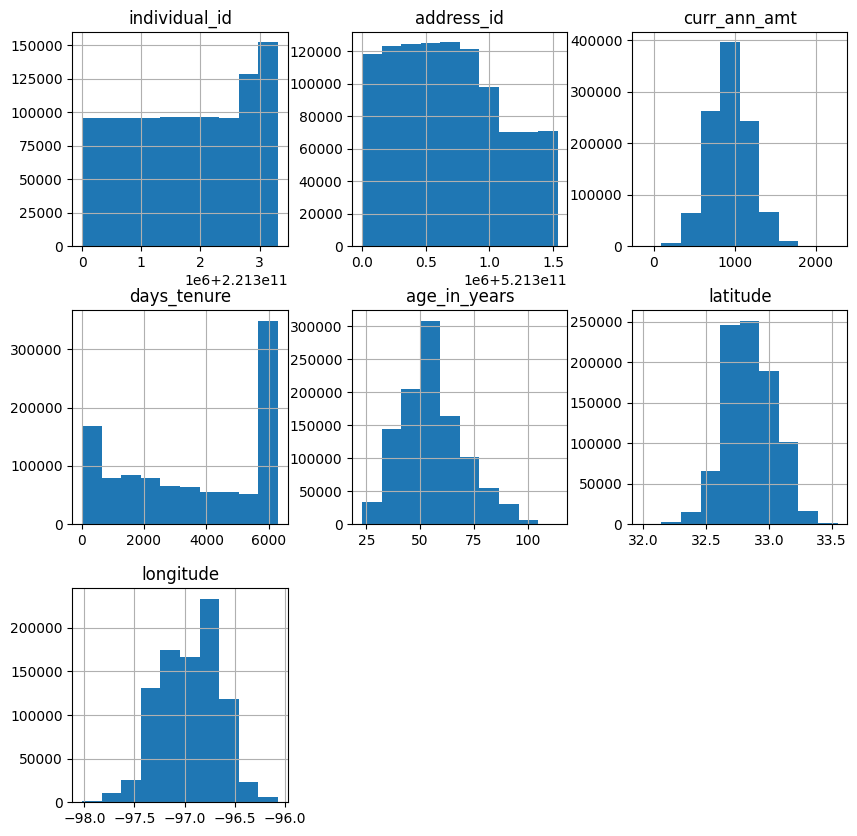

In [6]:
data[variables[:11]].hist(figsize=(10, 10));

In [7]:
# no aparecen cust_orig_date, date_of_birth, city, state.
data[["cust_orig_date", "date_of_birth"]].describe()

# analizar más

,cust_orig_date,date_of_birth
count,1048575,1048575
unique,5222,1076
top,2005-09-11,1967-07-07
freq,305100,89118


<AxesSubplot:>

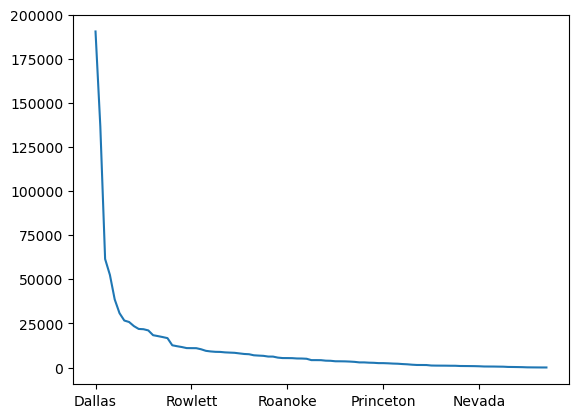

In [11]:
data["city"].value_counts().plot()

In [9]:
# state only has one value
data["state"].value_counts()

TX    1048575
Name: state, dtype: int64

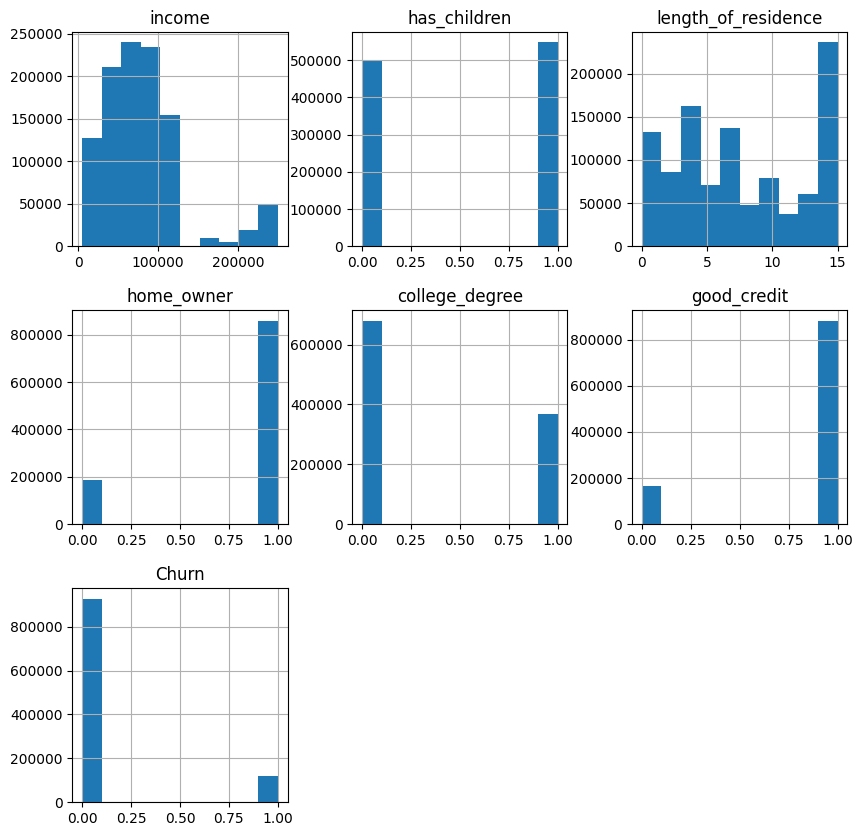

In [10]:
data[variables[11:]].hist(figsize=(10,10));

In [11]:
# no aparecen county, marital_status, home_market_value, acct_suspended_date

<Axes: >

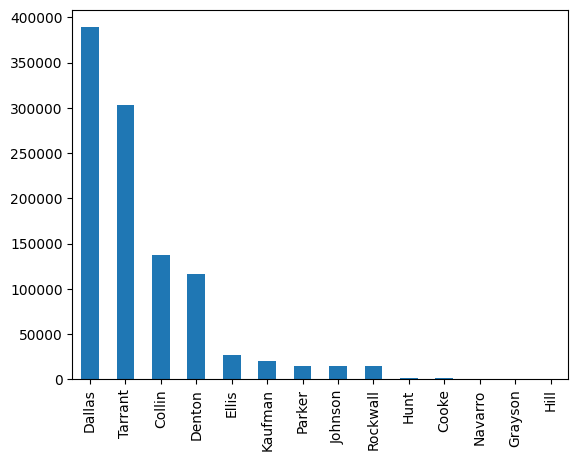

In [12]:
data["county"].value_counts().plot.bar()

<Axes: >

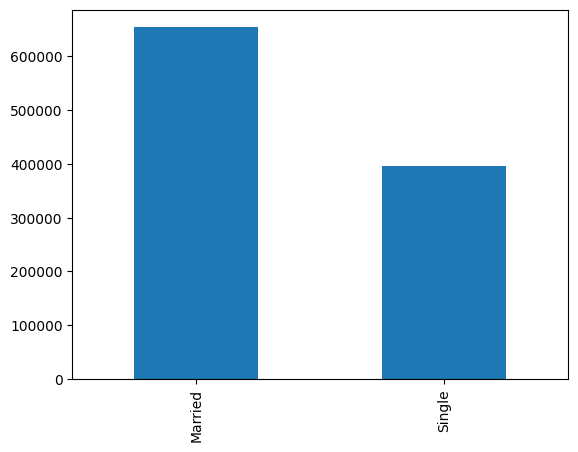

In [13]:
data["marital_status"].value_counts().plot.bar()

In [14]:
data["home_market_value"].value_counts()#.plot.bar()

## Análisis exploratorio limpio

In [4]:
num_vars = ["individual_id", "address_id", "curr_ann_amt", "age_in_years",
            "days_tenure", "latitude", "longitude",
            "income", "length_of_residence"]
cat_vars_num = ["has_children", "home_owner", "college_degree",
                "good_credit", "Churn"]
cat_other = [var for var in data.columns if var not in num_vars + cat_vars_num]
cat_other

['cust_orig_date',
 'date_of_birth',
 'city',
 'state',
 'county',
 'marital_status',
 'home_market_value',
 'acct_suspd_date']

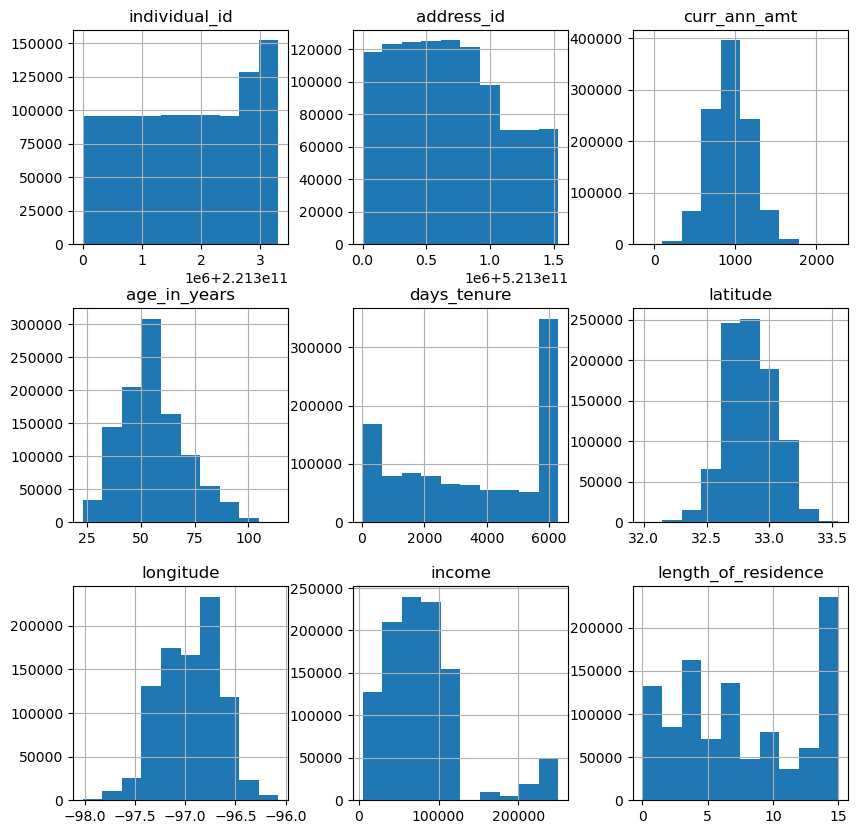

In [5]:
data[num_vars].hist(figsize=(10, 10));
plt.savefig("TFM_Plantilla_Latex_es/images/num_vars.png")

In [6]:
data_cat = data[cat_vars_num+cat_other]
data_cat.shape

(1048575, 13)

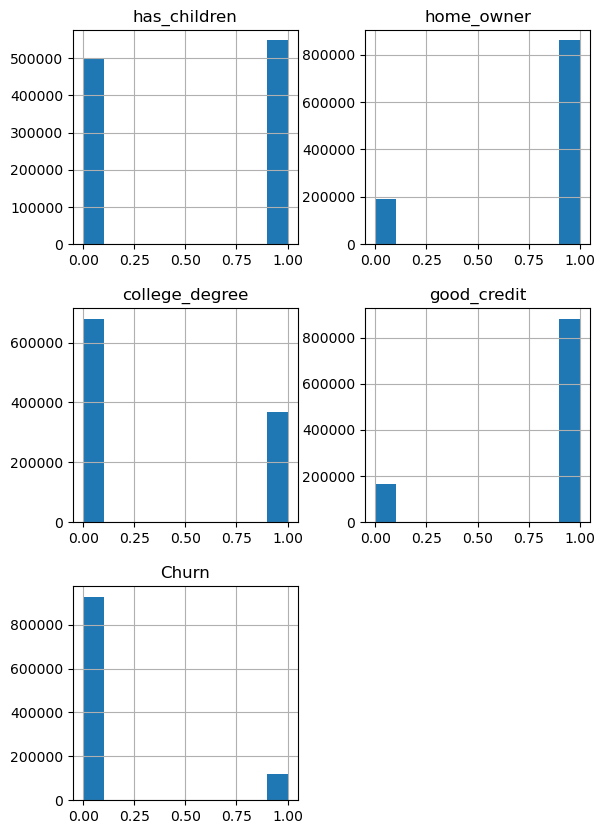

In [7]:
data[cat_vars_num].hist(figsize=(6.67, 10));
plt.savefig("TFM_Plantilla_Latex_es/images/cat_vars_num.png")

/tmp/ipykernel_7838/1459251966.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


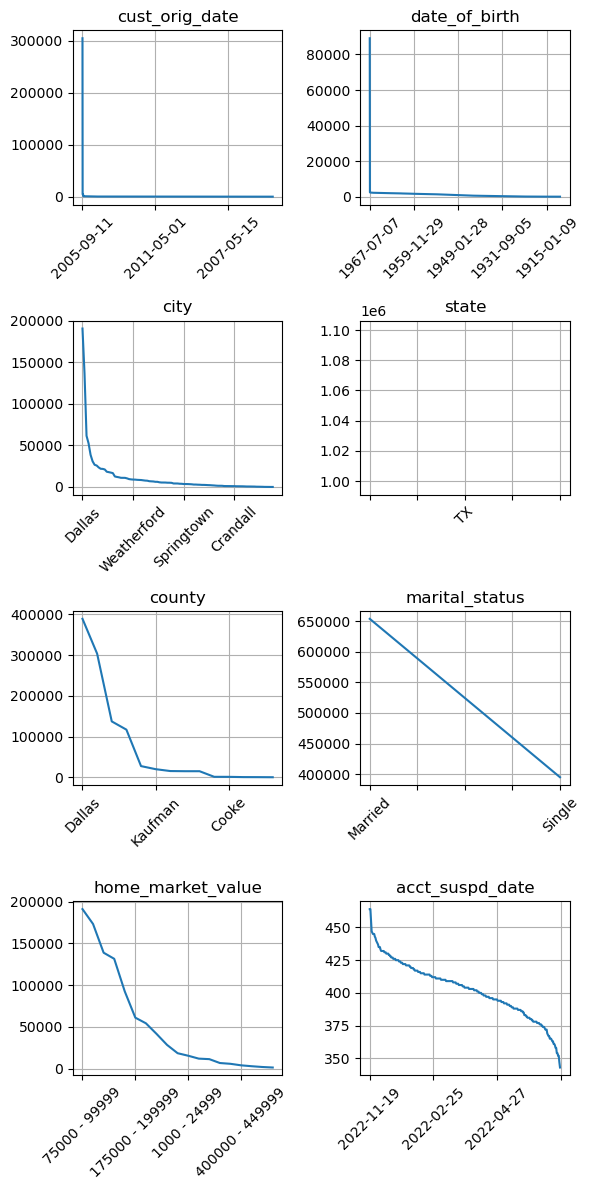

In [8]:
# gráfico de la distribución de cada variable, aunque sea no numérica
fig, axes = plt.subplots(4, 2, figsize=(6, 12))
axes = axes.flatten()
i=0
for i, var in enumerate(cat_other):
    data[var].value_counts().plot(ax=axes[i])
    axes[i].set_title(var)
    axes[i].grid(visible=True)
    axes[i].tick_params(axis='x', labelrotation=45)


fig.tight_layout()

fig.show()
fig.savefig("TFM_Plantilla_Latex_es/images/cat_vars_other.png")

In [9]:
data['cust_orig_date'].value_counts().head()



2005-09-11    305100
2022-09-13      9379
2019-08-16      9077
2022-06-24      5193
2018-07-10      4627
Name: cust_orig_date, dtype: int64

In [18]:
pd.Series(data['cust_orig_date'].unique()).sort_values().head()

21      2005-09-11
119     2005-09-13
4378    2005-09-14
5073    2005-09-15
3396    2005-09-16
dtype: object

In [13]:
data['date_of_birth'].value_counts().head()

1967-07-07    89118
1970-07-26     2430
1967-06-27     2373
1969-06-25     2334
1968-06-26     2312
Name: date_of_birth, dtype: int64

In [19]:
pd.Series(data['date_of_birth'].unique()).sort_values().head()

1031    1908-12-11
943     1909-01-10
1060    1909-02-07
1009    1909-03-10
1066    1909-04-09
dtype: object

# Preprocesamiento

## Valores nulos
Limpiamos y transformamos el dataset entero, después separamos en conjunto de entrenamiento y de test.

In [30]:
data.isna().sum()

individual_id               0
address_id                  0
curr_ann_amt                0
days_tenure                 0
cust_orig_date              0
age_in_years                0
date_of_birth               0
latitude               158163
longitude              158163
city                     7510
state                       0
county                   7510
income                      0
has_children                0
length_of_residence         0
marital_status              0
home_market_value       57429
home_owner                  0
college_degree              0
good_credit                 0
acct_suspd_date        927686
Churn                       0
dtype: int64

Para cada una de las variables, aplicaremos la política de valores siguiente:

    - latitude: eliminar variable.
    - longitude: eliminar variable.
    - city: eliminar registros con valor nulo.
    - county: eliminar registros con valor nulo.
    - home_market_value: imputar el valor medio de la variable
    - acct_suspd_date: eliminar variable



In [31]:
def convert_home_market_value(x):
    if x is np.nan:
        return 0
    if x == "1000000 Plus":
        return 1000000.0
    x = x.split(" - ")
    return np.mean(list(map(float, x)))

home_market_value_mean = data["home_market_value"].apply(convert_home_market_value).mean()
print("Valor medio de home_market_value: {:.2f}.".format(home_market_value_mean))
print("Por lo tanto hay que imputar el valor \"100000 - 124999\".")

Valor medio de home_market_value: 124863.25.
Por lo tanto hay que imputar el valor "100000 - 124999".


In [32]:
data["home_market_value"][data["home_market_value"].isna()] = "100000 - 124999"

/tmp/ipykernel_7838/3466061354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["home_market_value"][data["home_market_value"].isna()] = "100000 - 124999"


In [33]:
# Eliminar variables enteras
to_remove = ["latitude", "longitude", "acct_suspd_date"]
data.drop(to_remove, axis=1, inplace=True)

In [34]:
# Eliminar registros en city y county
data.dropna(inplace=True)

In [35]:
# No hay valor nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041065 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1041065 non-null  float64
 1   address_id           1041065 non-null  float64
 2   curr_ann_amt         1041065 non-null  float64
 3   days_tenure          1041065 non-null  float64
 4   cust_orig_date       1041065 non-null  object 
 5   age_in_years         1041065 non-null  int64  
 6   date_of_birth        1041065 non-null  object 
 7   city                 1041065 non-null  object 
 8   state                1041065 non-null  object 
 9   county               1041065 non-null  object 
 10  income               1041065 non-null  float64
 11  has_children         1041065 non-null  float64
 12  length_of_residence  1041065 non-null  float64
 13  marital_status       1041065 non-null  object 
 14  home_market_value    1041065 non-null  object 
 15

## Otras transformaciones

In [36]:
y = data['Churn']
X = data[[x for x in data.columns if x!='Churn']]
X.shape

(1041065, 18)

In [37]:
# ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

In [38]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_compressed = pca.fit_transform(X_scaled)
X_compressed.shape

(1041065, 13)

In [54]:
import seaborn as sns

pca_decomposition = pd.DataFrame(pca.components_, columns=X.columns)
pca_decomposition = pca_decomposition.apply(lambda x: np.round(x, decimals=1))
pca_decomposition

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,city,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit
0,0.1,0.1,0.1,0.4,-0.4,0.5,-0.5,-0.0,-0.0,0.0,0.0,-0.1,0.3,-0.1,0.1,0.2,0.1,0.0
1,0.6,0.6,-0.1,-0.0,0.0,0.0,-0.0,-0.1,0.0,0.1,-0.2,-0.1,-0.1,0.3,0.1,-0.1,-0.0,-0.2
2,-0.3,-0.3,-0.2,0.3,-0.3,0.0,-0.0,-0.1,-0.0,0.1,-0.4,-0.1,-0.2,0.3,0.0,-0.4,-0.2,-0.3
3,-0.2,-0.2,0.1,-0.4,0.4,0.3,-0.3,-0.2,0.0,0.2,-0.3,-0.2,0.3,0.0,0.3,0.1,-0.1,-0.2
4,0.0,0.0,-0.0,-0.2,0.2,0.3,-0.3,0.3,-0.0,-0.4,0.1,-0.4,-0.2,0.2,-0.5,-0.3,-0.0,0.2
5,0.0,0.0,-0.1,-0.1,0.1,0.2,-0.2,0.2,0.0,0.1,-0.2,0.5,-0.2,-0.4,-0.3,-0.1,0.3,-0.4
6,-0.0,-0.0,0.2,-0.0,0.0,0.1,-0.1,-0.6,-0.0,0.4,0.2,-0.0,-0.2,0.0,-0.2,-0.2,0.5,0.1
7,-0.0,-0.0,0.5,0.1,-0.1,-0.2,0.2,0.1,0.0,-0.4,-0.2,-0.2,0.2,0.2,0.1,0.0,0.5,-0.3
8,0.0,0.0,0.6,0.0,-0.0,-0.1,0.1,0.2,-0.0,0.3,0.0,-0.1,0.0,-0.2,-0.3,-0.2,-0.5,-0.3
9,-0.1,-0.1,-0.0,0.0,-0.0,-0.0,0.0,0.6,0.0,0.6,0.0,-0.2,-0.1,0.2,0.2,0.0,0.4,0.1


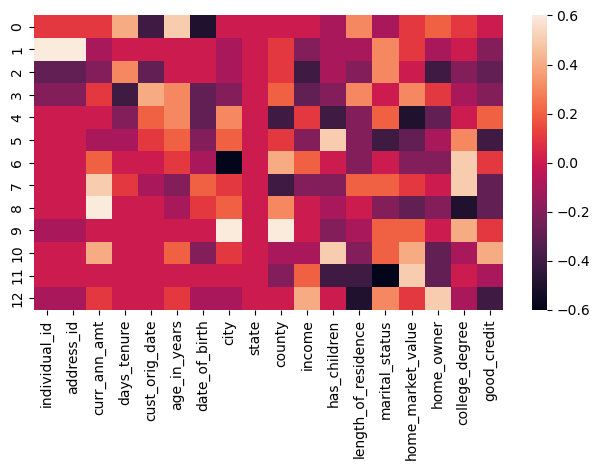

In [53]:
sns.heatmap(pca_decomposition)
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/pca.png")

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_compressed, y, random_state=42, train_size=0.7)

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_compressed, y)
pd.Series(y_res).value_counts()

0    921086
1    921086
Name: Churn, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_res, y_res, random_state=42, train_size=0.7)

# Modelado

## Random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
import pickle
forest = RandomForestClassifier()
# forest.fit(X_train, y_train)

In [20]:
# Cargar modelo
with open("models/forest.pkl", "rb") as f:
    forest = pickle.load(f)

In [20]:
# Guardar modelo
import pickle
with open("models/forest.pkl", "wb") as f:
    pickle.dump(forest, f)

In [20]:
y_pred = forest.predict(X_train)
y_correct = sum(y_train == y_pred)
print("Exactitud en entrenamiento: {}.".format(y_correct/len(y_train)))

Exactitud en entrenamiento: 0.9999506000041166.


In [21]:
y_pred_test = forest.predict(X_test)
y_correct_test = sum(y_test == y_pred_test)
print("Exactitud en test: {}.".format(y_correct_test/len(y_test)))

Exactitud en test: 0.8838242827868853.


In [19]:
print("Proporcion de representación de la clase 1 en el conjunto de entrenamiento: {}."
      .format(sum(y_train==1)/len(y_train)))
print("Proporcion de representación de la clase 1 en el conjunto de evaluación: {}."
      .format(sum(y_test==1)/len(y_test)))

Proporcion de representación de la clase 1 en el conjunto de entrenamiento: 0.11497300153002765.
Proporcion de representación de la clase 1 en el conjunto de evaluación: 0.1158843493852459.


In [20]:
# Claramente la clase 1 está infrarepresentada, quizá esto sea uana fuente de errores.
y_wrong_train = y_pred != y_train
print("Proporcion de unos clasificados erroneamente en el conjunto de entrenamiento: {}."
      .format(sum(y_train[y_wrong_train])/len(y_train[y_wrong_train])))
print("Todos los clasificados erroneamente son 1. En total hay {} de {}."
      .format(len(y_train[y_wrong_train]), len(y_train)))

Proporcion de unos clasificados erroneamente en el conjunto de entrenamiento: 1.0.
Todos los clasificados erroneamente son 1. En total hay 36 de 728745.


In [21]:
# Repetimos el análisis para el conjunto de evaluación
y_wrong_test = y_pred_test != y_test
print("Proporcion de unos clasificados erroneamente en el conjunto de entrenamiento: {}."
      .format(sum(y_test[y_wrong_test])/len(y_test[y_wrong_test])))
print("Casi todos los clasificados erroneamente son 1. En total hay {} de {}."
      .format(len(y_test[y_wrong_test]), len(y_test)))

Proporcion de unos clasificados erroneamente en el conjunto de entrenamiento: 0.9553797817219711.
Casi todos los clasificados erroneamente son 1. En total hay 36284 de 312320.


Observamos que, en ambos casos, el valor 1 de la variable Churn concentra muchos de los errores del modelo.
Para mejorar la eficacia del modelo consideramos utilizar SMOTE para equilibrar las clases.

## Random forest con SMOTE

In [21]:
forest_res = RandomForestClassifier()
# forest_res.fit(X_train, y_train)

In [21]:
# Cargar modelo
with open("models/forest_res.pkl", "rb") as f:
    forest_res = pickle.load(f)

In [43]:
# Guardar modelo
with open("models/forest_res.pkl", "wb") as f:
    pickle.dump(forest_res, f)

In [52]:
y_pred = forest_res.predict(X_train_SMOTE)
y_correct = sum(y_train_SMOTE == y_pred)
print("Exactitud en entrenamiento: {}.".format(y_correct/len(y_train_SMOTE)))

Exactitud en entrenamiento: 1.0.


In [53]:
y_pred_test = forest_res.predict(X_test_SMOTE)
y_correct_test = sum(y_test_SMOTE == y_pred_test)
print("Exactitud en test: {}.".format(y_correct_test/len(y_test_SMOTE)))

Exactitud en test: 0.899025064597613.


In [54]:
# exactitud sobre los unos: porcentage de 1s predecidos correctamente en test
y_wrong_test = y_pred_test != y_test_SMOTE
print("Proporcion de unos clasificados erroneamente en el conjunto de entrenamiento (entre los clasificados erroneamente): {}."
      .format(sum(y_test_SMOTE[y_wrong_test])/len(y_test_SMOTE[y_wrong_test])))
print("La mitad de los clasificados erroneamente son unos. Tiene sentido porque hay dos clases. En total hay {} de {}."
      .format(len(y_test_SMOTE[y_wrong_test]), len(y_test_SMOTE)))

## Gradient boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gboosting = GradientBoostingClassifier()

In [19]:
gboosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [27]:
# Cargar modelo
import pickle
with open("models/gboosting.pkl", "rb") as f:
    gboosting = pickle.load(f)

/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DummyClassifier from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/jordi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 1.2.1 when using version 1.0.2. This might lead

In [21]:
# Guardar modelo
import pickle
with open("models/gboosting.pkl", "wb") as f:
    pickle.dump(gboosting, f)

## Gradient boosting con SMOTE

In [22]:
gboosting_SMOTE = GradientBoostingClassifier()

In [26]:
gboosting_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

GradientBoostingClassifier()

In [28]:
# Cargar modelo
with open("models/gboosting_SMOTE.pkl", "rb") as f:
    gboosting_SMOTE = pickle.load(f)

In [27]:
# Guardar modelo
import pickle
with open("models/gboosting_SMOTE.pkl", "wb") as f:
    pickle.dump(gboosting_SMOTE, f)

## Grid Search con SMOTE y gradient boosting

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 10]
}

gb_grid_search = GradientBoostingClassifier()
grid_search = GridSearchCV(gb_grid_search, param_grid, scoring='accuracy',
                           return_train_score=True)

In [87]:
%%time
#grid_search.fit(X_train_SMOTE, y_train_SMOTE)

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 22.9 µs


## Redes neuronales

In [25]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
tf.config.list_physical_devices()

2024-12-27 16:35:44.361100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-27 16:35:44.473534: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-27 16:35:44.945994: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/jordi/anaconda3/envs/tf39/lib/:/home/jordi/anaconda3/envs/tf39/lib/python3.9/site-packages/nvidia/cudnn/lib
2024-12-27 16:35:44.946117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
nn_model = Sequential([
    Input(shape=(13,)),
    Dense(1024, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              14336     
                                                                 
 dense_1 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_2 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_3 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_4 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 12,605,441
Trainable params: 12,605,441
No

2024-12-25 18:35:57.238866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-25 18:35:57.239428: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-12-25 18:35:57.239627: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-12-25 18:35:57.239740: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [20]:
nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), 
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['binary_accuracy'])

In [21]:
nn_history = nn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
22774/22774 [==============================] - 126s 5ms/step - loss: 0.3767 - binary_accuracy: 0.8847
Epoch 2/10
22774/22774 [==============================] - 125s 5ms/step - loss: 0.3569 - binary_accuracy: 0.8850
Epoch 3/10
22774/22774 [==============================] - 124s 5ms/step - loss: 0.3569 - binary_accuracy: 0.8850
Epoch 4/10
22774/22774 [==============================] - 124s 5ms/step - loss: 0.3569 - binary_accuracy: 0.8850
Epoch 5/10
22774/22774 [==============================] - 124s 5ms/step - loss: 0.3569 - binary_accuracy: 0.8850
Epoch 6/10
22774/22774 [==============================] - 124s 5ms/step - loss: 0.3569 - binary_accuracy: 0.8850
Epoch 7/10
22774/22774 [==============================] - 125s 5ms/step - loss: 0.3569 - binary_accuracy: 0.8850
Epoch 8/10
22774/22774 [==============================] - 124s 5ms/step - loss: 0.3570 - binary_accuracy: 0.8850
Epoch 9/10
22774/22774 [==============================] - 124s 5ms/step - loss: 0.3569 - binary_

In [26]:
nn_model = keras.models.load_model('models/nn_model.keras')

2024-12-27 16:35:45.443174: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-27 16:35:45.444089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-12-27 16:35:45.444317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-12-27 16:35:45.444477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [22]:
nn_model.save('models/nn_model.keras')

## Redes neuronales SMOTE

In [33]:
nn_model_SMOTE = Sequential([
    Input(shape=(13,)),
    Dense(1024, activation='relu'),
    Dense(2048, activation='relu'),
    #BatchNormalization(momentum=5),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    #BatchNormalization(momentum=5),
    Dense(1024, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model_SMOTE.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              14336     
                                                                 
 dense_13 (Dense)            (None, 2048)              2099200   
                                                                 
 dense_14 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_15 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_16 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_17 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 12,605,441
Trainable params: 12,605,441


In [34]:
nn_model_SMOTE.compile(optimizer=keras.optimizers.SGD(nesterov=True), 
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['binary_accuracy'])

In [35]:
nn_SMOTE_history = nn_model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE, epochs=30)

Epoch 1/30
40298/40298 [==============================] - 147s 4ms/step - loss: 0.5894 - binary_accuracy: 0.6932
Epoch 2/30
40298/40298 [==============================] - 147s 4ms/step - loss: 0.5822 - binary_accuracy: 0.6980
Epoch 3/30
40298/40298 [==============================] - 147s 4ms/step - loss: 0.5787 - binary_accuracy: 0.6990
Epoch 4/30
40298/40298 [==============================] - 147s 4ms/step - loss: 0.5745 - binary_accuracy: 0.7004
Epoch 5/30
40298/40298 [==============================] - 147s 4ms/step - loss: 0.5694 - binary_accuracy: 0.7035
Epoch 6/30
40298/40298 [==============================] - 147s 4ms/step - loss: 0.5630 - binary_accuracy: 0.7077
Epoch 7/30
40298/40298 [==============================] - 148s 4ms/step - loss: 0.5556 - binary_accuracy: 0.7140
Epoch 8/30
40298/40298 [==============================] - 147s 4ms/step - loss: 0.5462 - binary_accuracy: 0.7220
Epoch 9/30
40298/40298 [==============================] - 148s 4ms/step - loss: 0.5349 - binary_

In [27]:
nn_model_SMOTE = keras.models.load_model('models/nn_model_SMOTE.keras')

In [37]:
nn_model_SMOTE.save('models/nn_model_SMOTE.keras')

# Evaluación
En ésta sección nos centramos en evaluar los modelos más detalladamente, con métricas como precisión o sensibilidad, o matriz de confusión.

## Matrices de confusión
En este apartado compararemos las matrices de confusión comparando los resultados obtenidos con y sin la técnica SMOTE.

El componente $(i, j)$ de la matriz és el número de instancias de la verdadera clase $i$ clasificadas como $j$.

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [23]:
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

In [25]:
print("Matriz de confusión para el conjunto de entrenamiento:")
confusion_matrix(y_train, y_pred_train, normalize=None)

Matriz de confusión para el conjunto de entrenamiento:


array([[644959,      0],
       [    36,  83750]])

In [26]:
print("Matriz de confusión para el conjunto de evaluación:")
confusion_matrix(y_test, y_pred_test, normalize=None)

Matriz de confusión para el conjunto de evaluación:


array([[274508,   1619],
       [ 34665,   1528]])

In [34]:
y_pred_train_SMOTE = forest_res.predict(X_train_SMOTE)
y_pred_test_SMOTE = forest_res.predict(X_test_SMOTE)

In [28]:
print("Matriz de confusión para el conjunto de entrenamiento usando SMOTE:")
confusion_matrix(y_train_SMOTE, y_pred_train_SMOTE, normalize=None)

Matriz de confusión para el conjunto de entrenamiento usando SMOTE:


array([[644731,      0],
       [     0, 644789]])

In [29]:
print("Matriz de confusión para el conjunto de evaluación usando SMOTE:")
confusion_matrix(y_test_SMOTE, y_pred_test_SMOTE, normalize=None)

Matriz de confusión para el conjunto de evaluación usando SMOTE:


array([[249335,  27020],
       [ 28784, 247513]])

## Otras métricas, random forests


In [36]:
results = {}
metrics = [accuracy_score, precision_score, recall_score, f1_score]

results['Training'] = [metric(y_train, y_pred_train) for metric in metrics]
results['Test'] = [metric(y_test, y_pred_test) for metric in metrics]
results['Training with SMOTE'] = [metric(y_train_SMOTE, y_pred_train_SMOTE) for metric in metrics]
results['Test with SMOTE'] = [metric(y_test_SMOTE, y_pred_test_SMOTE) for metric in metrics]
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy', 'precision', 'recall', 'f1_score'])

In [37]:
proba_train = forest.predict_proba(X_train)[:, 1]
proba_test = forest.predict_proba(X_test)[:, 1]
proba_train_SMOTE = forest_res.predict_proba(X_train_SMOTE)[:, 1]
proba_test_SMOTE = forest_res.predict_proba(X_test_SMOTE)[:, 1]

In [38]:
results_df.loc['Training', 'auc'] = roc_auc_score(y_train, proba_train)
results_df.loc['Test', 'auc'] = roc_auc_score(y_test, proba_test)
results_df.loc['Training with SMOTE', 'auc'] = roc_auc_score(y_train_SMOTE, proba_train_SMOTE)
results_df.loc['Test with SMOTE', 'auc'] = roc_auc_score(y_test_SMOTE, proba_test_SMOTE)

results_df

,accuracy,precision,recall,f1_score,auc
Training,0.999951,1.000000,0.999570,0.999785,1.000000
Test,0.883824,0.485542,0.042218,0.077682,0.693993
Training with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000
Test with SMOTE,0.899025,0.901578,0.895822,0.898691,0.960980


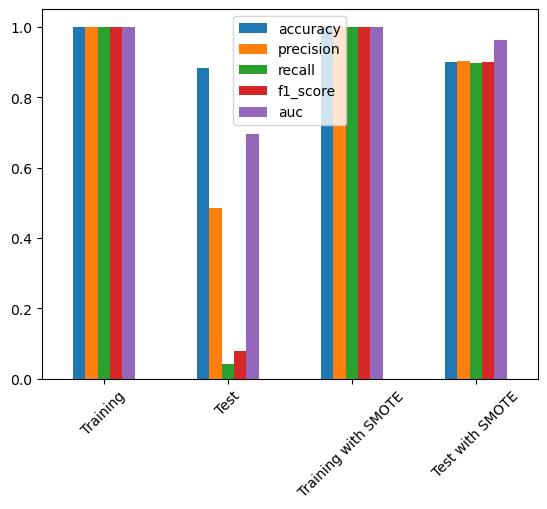

In [39]:
results_df.plot.bar()
plt.xticks(rotation=45)
plt.savefig("TFM_Plantilla_Latex_es/images/model_comparison.png", bbox_inches='tight')

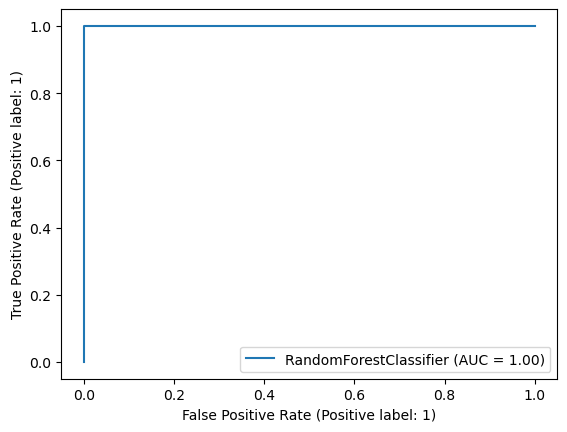

In [54]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(forest, X_train, y_train)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_train.png")

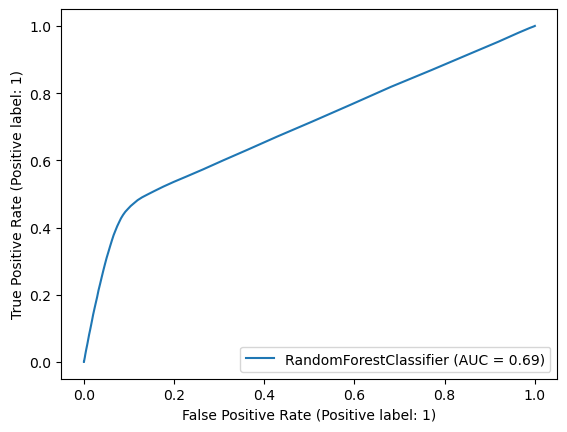

In [55]:
RocCurveDisplay.from_estimator(forest, X_test, y_test)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_test.png")

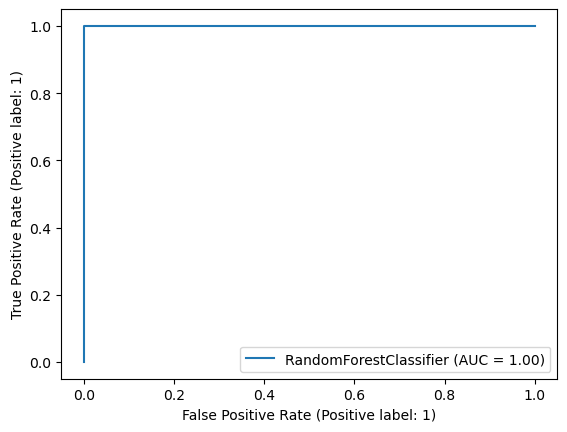

In [56]:
RocCurveDisplay.from_estimator(forest_res, X_train_SMOTE, y_train_SMOTE)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_train_SMOTE.png")

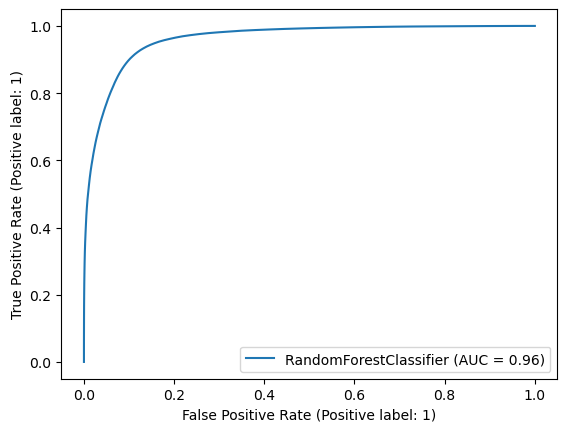

In [57]:
RocCurveDisplay.from_estimator(forest_res, X_test_SMOTE, y_test_SMOTE)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_test_SMOTE.png")

## Otras métricas, gradient boosting

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def build_results_df(model, model_SMOTE):
    results = {}
    metrics = [accuracy_score, precision_score, recall_score, f1_score]

    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_train_SMOTE = model_SMOTE.predict(X_train_SMOTE)
    y_pred_test_SMOTE = model_SMOTE.predict(X_test_SMOTE)
    
    proba_train = model.predict_proba(X_train)[:, 1]
    proba_test = model.predict_proba(X_test)[:, 1]
    proba_train_SMOTE = model_SMOTE.predict_proba(X_train_SMOTE)[:, 1]
    proba_test_SMOTE = model_SMOTE.predict_proba(X_test_SMOTE)[:, 1]

    results['Training'] = [metric(y_train, y_pred_train) for metric in metrics]
    results['Test'] = [metric(y_test, y_pred_test) for metric in metrics]
    results['Training with SMOTE'] = [metric(y_train_SMOTE, y_pred_train_SMOTE) for metric in metrics]
    results['Test with SMOTE'] = [metric(y_test_SMOTE, y_pred_test_SMOTE) for metric in metrics]
    results_df = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy', 'precision', 'recall', 'f1_score'])
    
    results_df.loc['Training', 'auc'] = roc_auc_score(y_train, proba_train)
    results_df.loc['Test', 'auc'] = roc_auc_score(y_test, proba_test)
    results_df.loc['Training with SMOTE', 'auc'] = roc_auc_score(y_train_SMOTE, proba_train_SMOTE)
    results_df.loc['Test with SMOTE', 'auc'] = roc_auc_score(y_test_SMOTE, proba_test_SMOTE)
    
    return results_df

In [32]:
results_df_gb = build_results_df(gboosting, gboosting_SMOTE)
results_df_gb

,accuracy,precision,recall,f1_score,auc
Training,0.885031,0.578947,0.000131,0.000263,0.696145
Test,0.884103,0.000000,0.000000,0.000000,0.693933
Training with SMOTE,0.664754,0.707211,0.562358,0.626521,0.702940
Test with SMOTE,0.664937,0.707221,0.562793,0.626794,0.701641


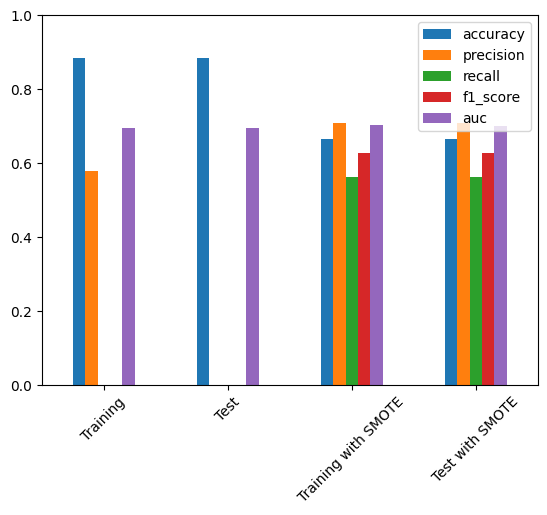

In [33]:
results_df_gb.plot.bar()
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.savefig("TFM_Plantilla_Latex_es/images/model_comparison_gb.png", bbox_inches='tight')

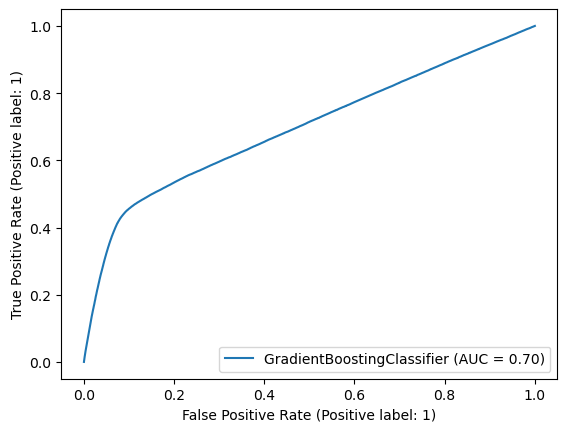

In [92]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gboosting, X_train, y_train)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_gb_train.png")

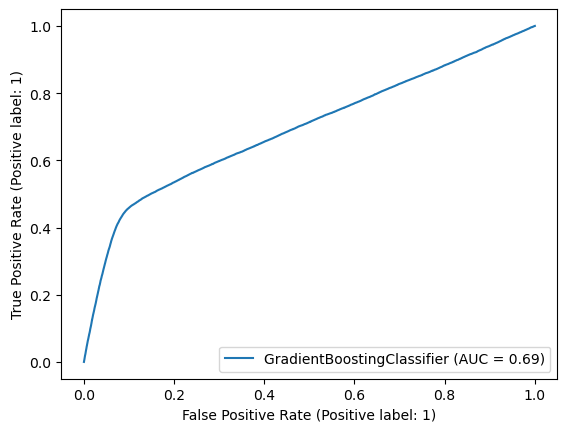

In [93]:
RocCurveDisplay.from_estimator(gboosting, X_test, y_test)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_gb_test.png")

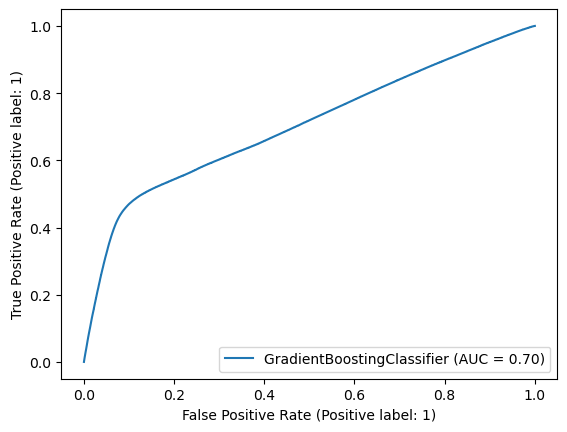

In [94]:
RocCurveDisplay.from_estimator(gboosting_SMOTE, X_train_SMOTE, y_train_SMOTE)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_gb_train_SMOTE.png")

In [95]:
RocCurveDisplay.from_estimator(gboosting_SMOTE, X_test_SMOTE, y_test_SMOTE)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_gb_test_SMOTE.png")

## Otras métricas, redes neuronales

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def build_results_df_nn(model, model_SMOTE):
    results = {}
    metrics = [accuracy_score, precision_score, recall_score, f1_score]

    
    proba_train = model.predict(X_train)
    proba_test = model.predict(X_test)
    proba_train_SMOTE = model_SMOTE.predict(X_train_SMOTE)
    proba_test_SMOTE = model_SMOTE.predict(X_test_SMOTE)

    results['Training'] = [metric(y_train, np.round(proba_train)) for metric in metrics]
    results['Test'] = [metric(y_test, np.round(proba_test)) for metric in metrics]
    results['Training with SMOTE'] = [metric(y_train_SMOTE, np.round(proba_train_SMOTE)) for metric in metrics]
    results['Test with SMOTE'] = [metric(y_test_SMOTE, np.round(proba_test_SMOTE)) for metric in metrics]
    results_df = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy', 'precision', 'recall', 'f1_score'])
    
    results_df.loc['Training', 'auc'] = roc_auc_score(y_train, proba_train)
    results_df.loc['Test', 'auc'] = roc_auc_score(y_test, proba_test)
    results_df.loc['Training with SMOTE', 'auc'] = roc_auc_score(y_train_SMOTE, proba_train_SMOTE)
    results_df.loc['Test with SMOTE', 'auc'] = roc_auc_score(y_test_SMOTE, proba_test_SMOTE)
    
    return results_df

In [23]:
results_df_nn = build_results_df_nn(nn_model, nn_model_SMOTE)

In [25]:
results_df_nn

,accuracy,precision,recall,f1_score,auc
Training,0.885027,0.000000,0.000000,0.000000,0.500000
Test,0.884116,0.000000,0.000000,0.000000,0.500000
Training with SMOTE,0.937100,0.912010,0.967554,0.938961,0.983795
Test with SMOTE,0.880391,0.843835,0.933521,0.886415,0.942701


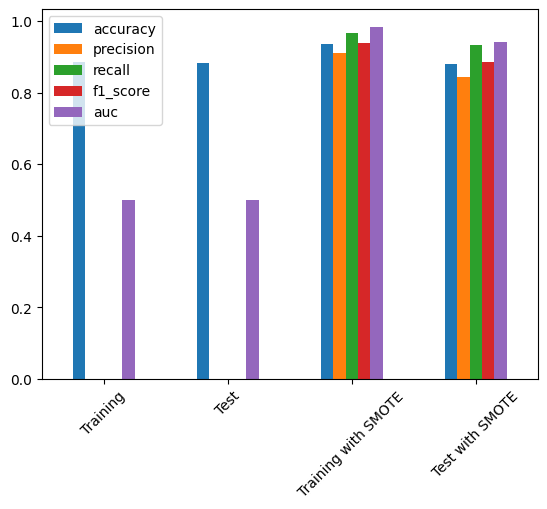

In [26]:
results_df_nn.plot.bar()
plt.xticks(rotation=45)
plt.savefig("TFM_Plantilla_Latex_es/images/model_comparison_nn.png", bbox_inches='tight')

In [35]:
proba_train_nn = nn_model.predict(X_train)
proba_test_nn = nn_model.predict(X_test)
proba_train_SMOTE_nn = nn_model_SMOTE.predict(X_train_SMOTE)
proba_test_SMOTE_nn = nn_model_SMOTE.predict(X_test_SMOTE)

17271/17271 [==============================] - 14s 825us/step


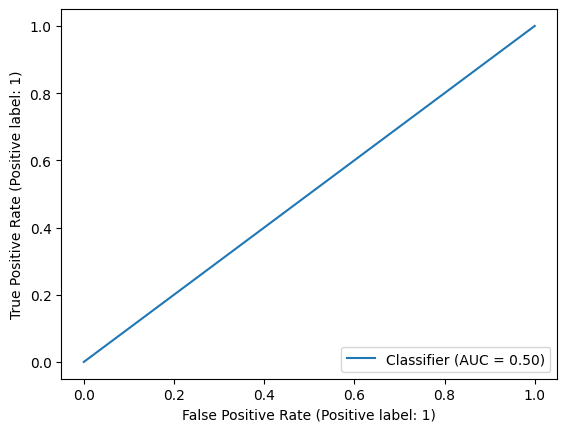

In [37]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_train, proba_train_nn)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_nn_train.png")

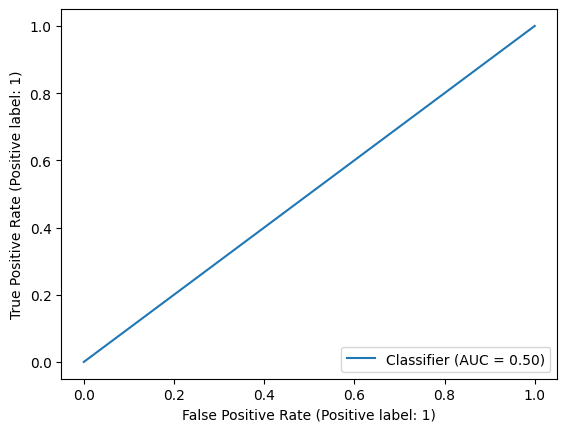

In [38]:
RocCurveDisplay.from_predictions(y_test, proba_test_nn)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_nn_test.png")

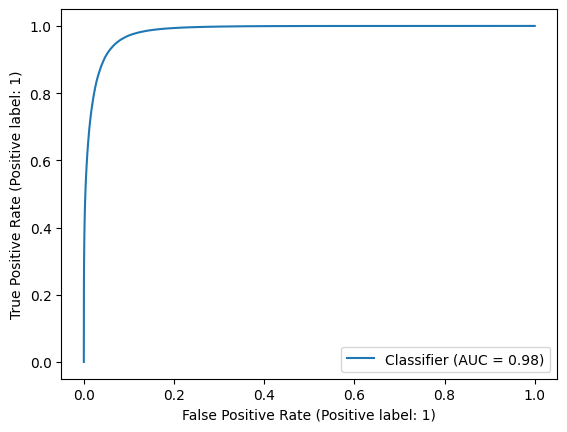

In [39]:
RocCurveDisplay.from_predictions(y_train_SMOTE, proba_train_SMOTE_nn)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_nn_train_SMOTE.png")

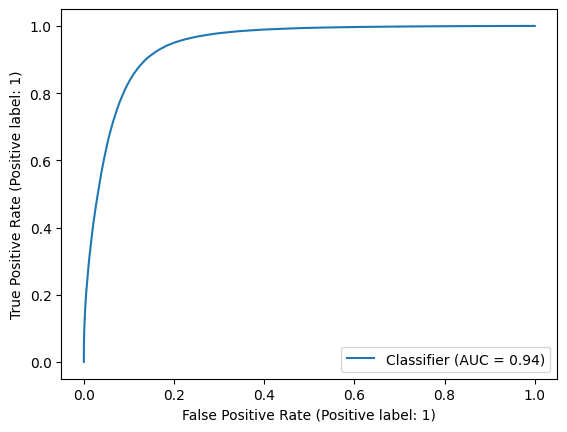

In [40]:
RocCurveDisplay.from_predictions(y_test_SMOTE, proba_test_SMOTE_nn)
plt.savefig("TFM_Plantilla_Latex_es/images/roc_nn_test_SMOTE.png")

# LIME
Links:

https://safjan.com/lime-tutorial/

https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime

https://cran.r-project.org/web/packages/lime/vignettes/Understanding_lime.html


https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict

https://lime-ml.readthedocs.io/en/latest/lime.html#lime.explanation.Explanation

In [22]:
import lime
import lime.lime_tabular

## LIME del Random Forest
Observaremos los resultados para cinco instancias, 2 de la clase 1 y tres de la clase 0. Las explicaciones las hacemos con el conjunto de entrenamiento.

### Negative class

In [29]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, verbose=True, mode='classification', random_state=42)

In [30]:
y_pred_test = forest.predict(X_test)
np.where(y_pred_test==1)[0][0:10]

array([  1,   6,  74,  80, 164, 243, 255, 319, 331, 355])

In [31]:
forest.predict_proba(X_test[6, :].reshape(1, -1))

array([[0.49, 0.51]])

In [32]:
j = 5
exp = explainer.explain_instance(X_test[j, :], forest.predict_proba, num_features=6)

Intercept 0.12897795831010067
Prediction_local [0.27876182]
Right: 0.2


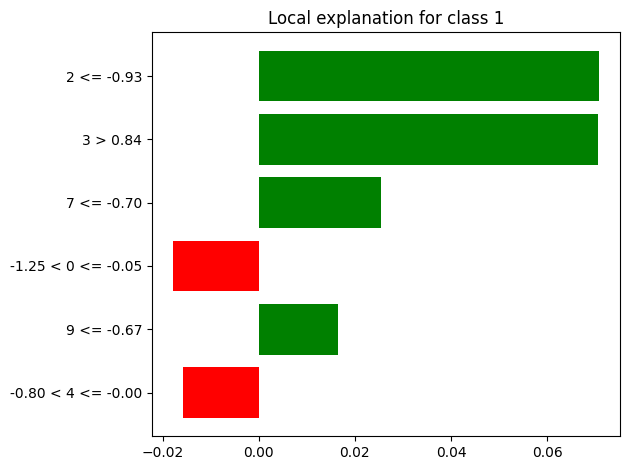

In [33]:
exp.as_pyplot_figure();
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/explain_rf-neg.png")

### Positive Class

In [34]:
np.where(y_pred_test==1)[0][0:10]

array([  1,   6,  74,  80, 164, 243, 255, 319, 331, 355])

In [35]:
j = 6
exp = explainer.explain_instance(X_test[j, :], forest.predict_proba, num_features=6)

Intercept 0.12497878871227348
Prediction_local [0.29824521]
Right: 0.51


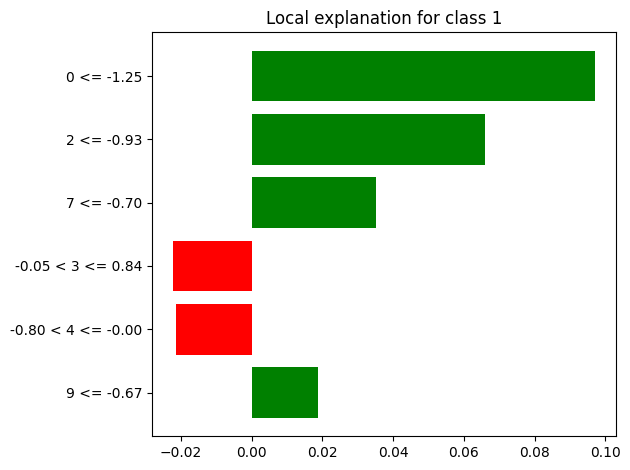

In [36]:
exp.as_pyplot_figure();
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/explain_rf-pos.png")

## LIME del Random Forest con SMOTE

### Negative class

In [37]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_SMOTE, verbose=True, mode='classification', random_state=42)

In [38]:
y_pred_test_SMOTE = forest_res.predict(X_test_SMOTE)
np.where(y_pred_test_SMOTE==1)[0][0:10]

array([ 2,  4,  5, 10, 15, 17, 23, 26, 34, 35])

In [39]:
j = 6
exp = explainer.explain_instance(X_test_SMOTE[j, :], forest_res.predict_proba, num_features=6)

Intercept 0.3484331959433476
Prediction_local [0.2608059]
Right: 0.19


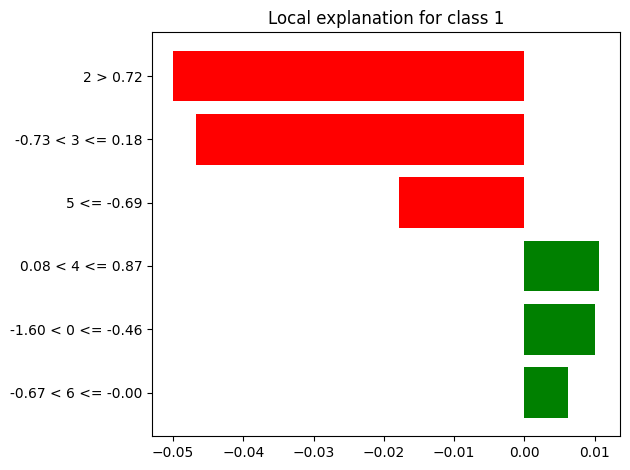

In [40]:
exp.as_pyplot_figure();
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/explain_rf_SMOTE-neg.png")

### Positive class

In [41]:
j = 2
exp = explainer.explain_instance(X_test_SMOTE[j, :], forest_res.predict_proba, num_features=6)

Intercept 0.2644751468619416
Prediction_local [0.51433791]
Right: 0.92


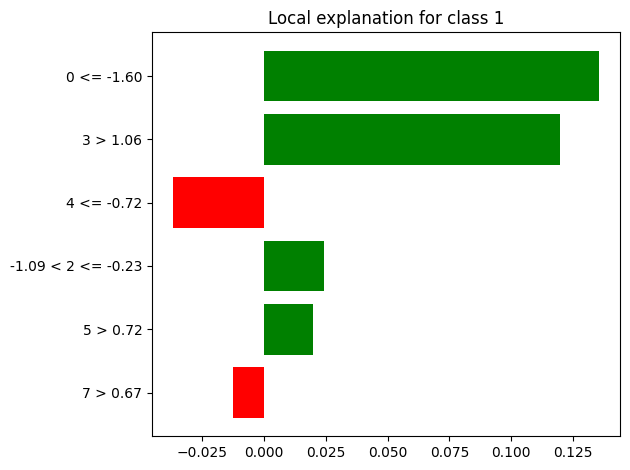

In [42]:
exp.as_pyplot_figure();
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/explain_rf_SMOTE-pos.png")

## Gradient Boosting sin SMOTE

In [23]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, verbose=True, mode='classification', random_state=42)

In [29]:
y_pred = gboosting.predict(X_test)
np.where(y_pred==1)

AttributeError: 'GradientBoostingClassifier' object has no attribute 'loss_'

### Negative Class

In [45]:
j = 0
exp = explainer.explain_instance(X_test[j, :], gboosting.predict_proba, num_features=6)

Intercept 0.14625621561508712
Prediction_local [0.0301945]
Right: 0.06670268327279912


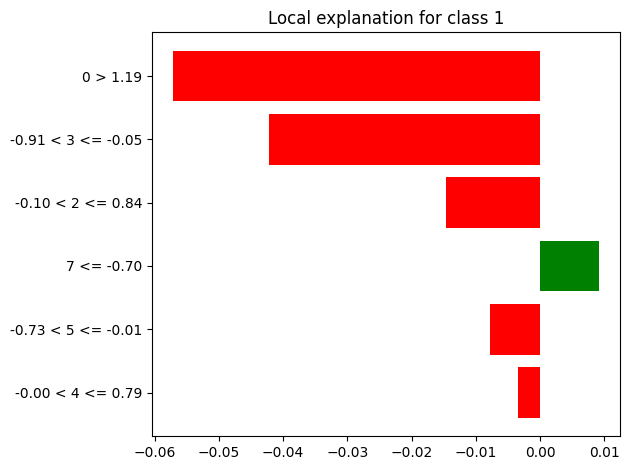

In [46]:
exp.as_pyplot_figure();
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/explain_gb-neg.png")

### Positive class

In [47]:
j = 9788
exp = explainer.explain_instance(X_test[j, :], gboosting.predict_proba, num_features=6)

Intercept 0.15039976816046602
Prediction_local [0.02250498]
Right: 0.06071469773527734


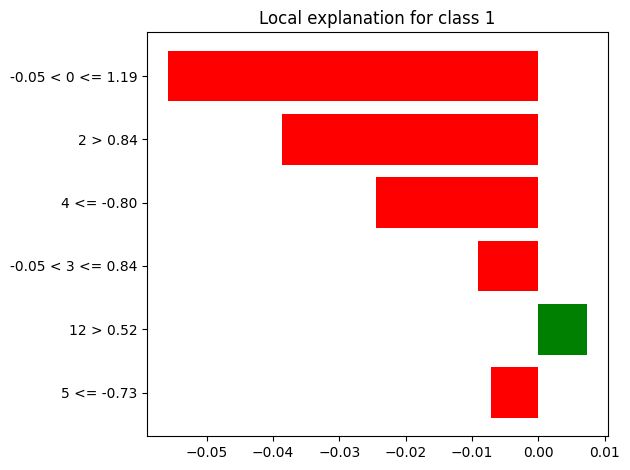

In [48]:
exp.as_pyplot_figure();
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/explain_gb-pos.png")

## Gradient Boosting con SMOTE

In [49]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_SMOTE, verbose=True, mode='classification', random_state=42)

In [50]:
y_pred = gboosting_SMOTE.predict(X_train_SMOTE)
np.where(y_pred==1)

(array([      5,       8,      10, ..., 1289511, 1289512, 1289516]),)

### Negative Class

In [51]:
j = 0
exp = explainer.explain_instance(X_test_SMOTE[j, :], gboosting_SMOTE.predict_proba, num_features=6)

Intercept 0.4806359490616598
Prediction_local [0.45200614]
Right: 0.43224003833009034


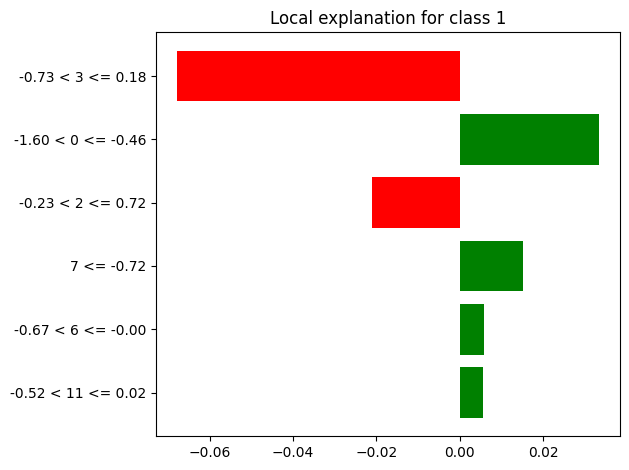

In [52]:
exp.as_pyplot_figure();
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/explain_gb_SMOTE-neg.png")

### Positive Class

In [53]:
j = 5
exp = explainer.explain_instance(X_test_SMOTE[j, :], gboosting_SMOTE.predict_proba, num_features=6)

Intercept 0.5203941428394665
Prediction_local [0.3394453]
Right: 0.3736503107713611


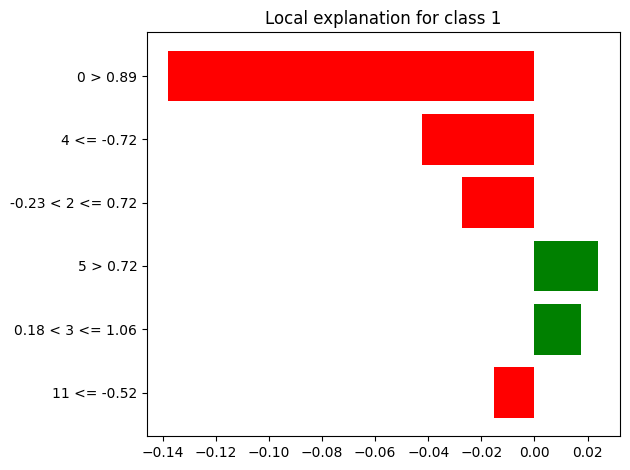

In [54]:
exp.as_pyplot_figure();
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/explain_gb_SMOTE-pos.png")

## Redes neuronales sin SMOTE

In [55]:
def nn_predict_proba(predict_proba_1):
    
    def predict_proba(X):
        y = predict_proba_1(X)
        return np.concatenate([1-y, y], axis=1)
    
    return predict_proba

In [56]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, verbose=True, mode='classification', random_state=42)

### Negative class

In [57]:
j=0
exp = explainer.explain_instance(X_test[j, :], nn_predict_proba(nn_model.predict), num_features=6)

157/157 [==============================] - 0s 1ms/step
Intercept 0.1225771754980087
Prediction_local [0.12257718]
Right: 0.122577175


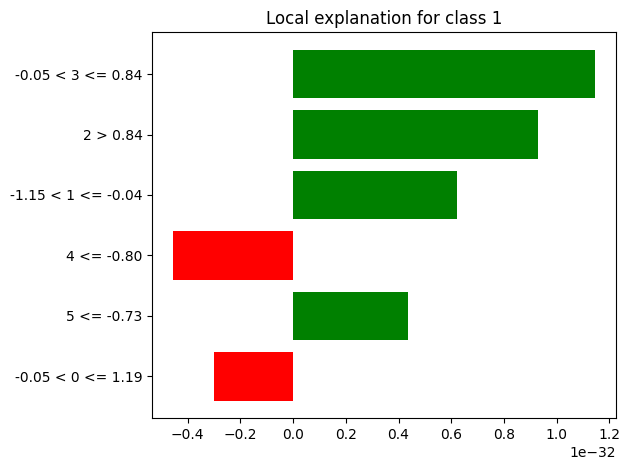

In [58]:
exp.as_pyplot_figure();
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/explain_nn-neg.png")

## Redes neuronales con SMOTE

In [59]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_SMOTE, verbose=True, mode='classification', random_state=42)

### Negative class

In [60]:
y_pred = nn_model_SMOTE.predict(X_train_SMOTE[0:100,:])
np.where(np.round(y_pred.flatten())==1)

4/4 [==============================] - 0s 1ms/step


(array([ 1,  6,  8,  9, 10, 12, 14, 15, 17, 19, 30, 31, 32, 34, 36, 37, 39,
        40, 41, 42, 46, 47, 49, 51, 55, 58, 59, 60, 61, 63, 65, 66, 70, 71,
        72, 73, 76, 77, 81, 82, 84, 85, 87, 88, 89, 90, 93, 95, 96, 97, 98]),)

In [61]:
j=0
exp = explainer.explain_instance(X_test_SMOTE[j, :], nn_predict_proba(nn_model_SMOTE.predict), num_features=6)

157/157 [==============================] - 0s 1ms/step
Intercept 0.1784485092193712
Prediction_local [0.30867573]
Right: 0.2374692


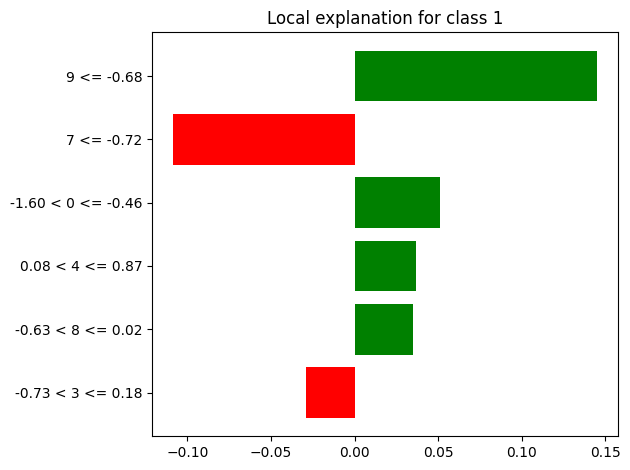

In [62]:
exp.as_pyplot_figure();
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/explain_nn_SMOTE-neg.png")

### Positive class

In [63]:
j=1
exp = explainer.explain_instance(X_test_SMOTE[j, :], nn_predict_proba(nn_model_SMOTE.predict), num_features=6)

157/157 [==============================] - 0s 1ms/step
Intercept 0.16652549963002677
Prediction_local [0.31895631]
Right: 0.00028214458


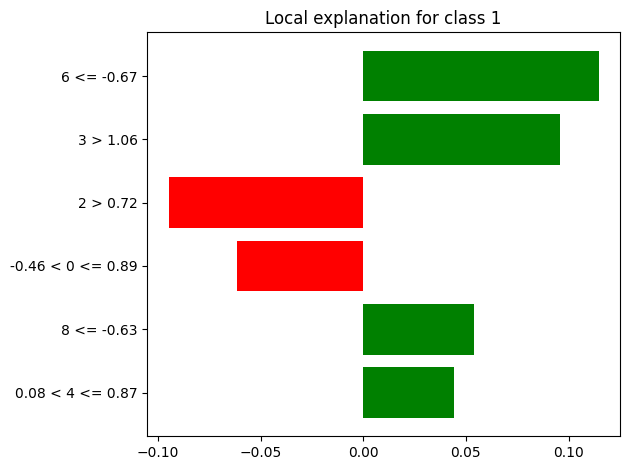

In [64]:
exp.as_pyplot_figure();
plt.tight_layout()
plt.savefig("TFM_Plantilla_Latex_es/images/explain_nn_SMOTE-pos.png")